In [ ]:
Project 4:
Feature Forge: Enhancing & Evaluating ML Models

In [ ]:
Objective: To Build various ML models that can predict loan approval

In [140]:
# step 1
#Importing libraries that will be used in this notebook.

import numpy as np
import pandas as pd

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

In [133]:
# Step 2
# Reading data Set
df = pd.read_csv("Loanpredictdata.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [134]:
print(df.shape)

(614, 13)


In [135]:
# Data Exploration
#column information
df.info()
#summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
# MILESTONE 1

# Preprocessing dataset


In [136]:
# Drop Loan_ID column, it is not neccessary
df.drop(['Loan_ID'], axis=1, inplace=True)

In [103]:
#missing values in decsending order
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
Each value will be replaced by the most frequent value (mode).

E.G. Credit_History has 50 null values 
therefore each null value will be replaced by the mode 1.0 


In [118]:
#filling the missing data
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
    print(f"{col}:\n{df[col].value_counts()}\n","-"*50)
    df[col] = df[col].fillna(
    df[col].dropna().mode().values[0] )   
    print(f"\n{col}:\n{df[col].value_counts()}\n","-"*50)

Credit_History:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
 --------------------------------------------------

Credit_History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
 --------------------------------------------------

Self_Employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
 --------------------------------------------------

LoanAmount:
LoanAmount
120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
 ------------------------------------

In [144]:
df.dropna(inplace=True) # removes any rows in the DataFrame that contain NaN values

In [145]:
print(df.duplicated().sum()) # Print duplicate rows

0


In [ ]:
# Data Visualization

In [121]:
#splitting data into categorical and numerical 

#list of all the numeric columns
numerical = df.select_dtypes('number').columns.to_list()

#list of all the categoric columns
categorical = df.select_dtypes('object').columns.to_list()
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

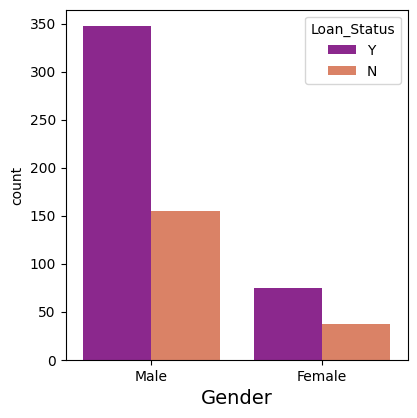

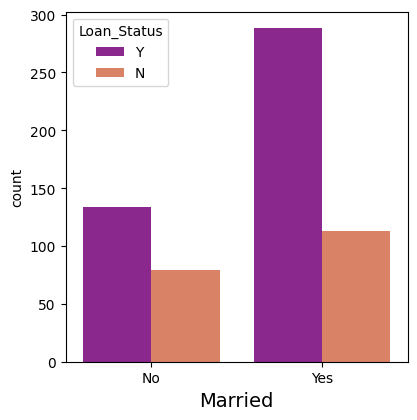

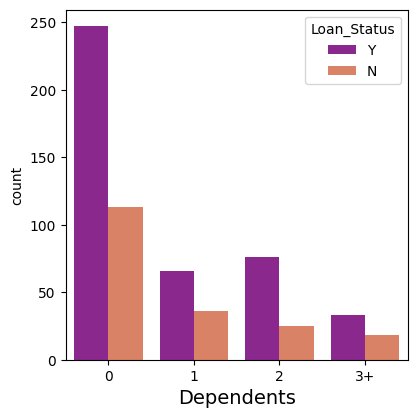

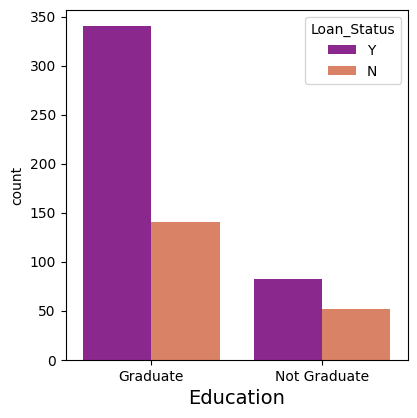

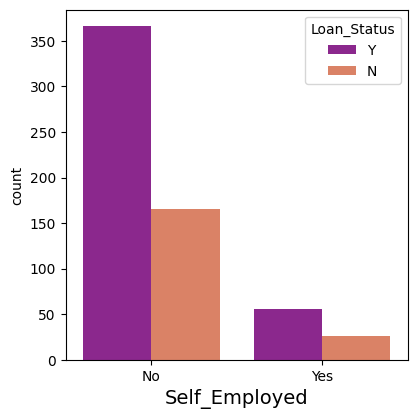

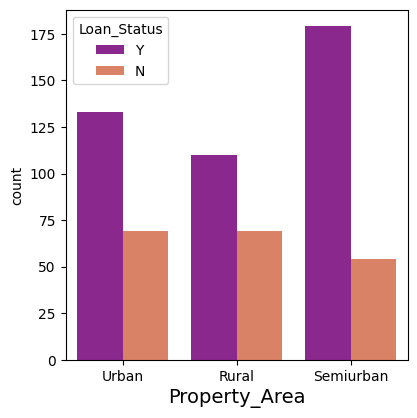

In [125]:
#plot for categorical columns
for i in categorical[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

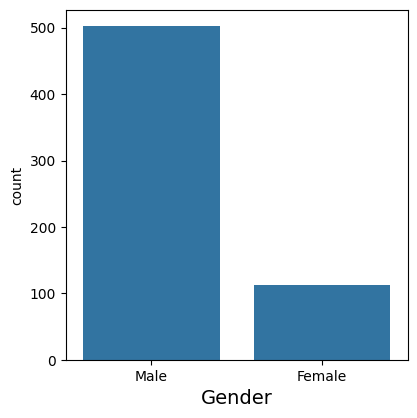

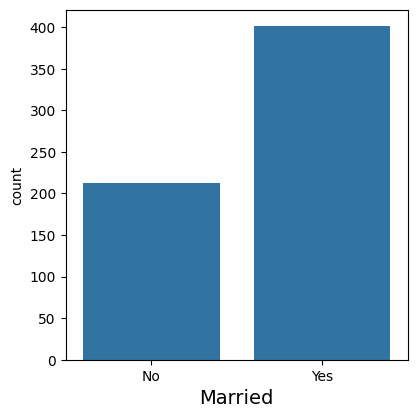

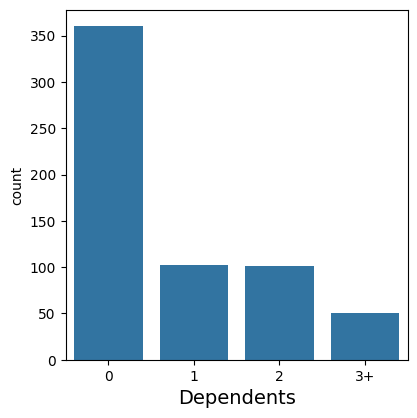

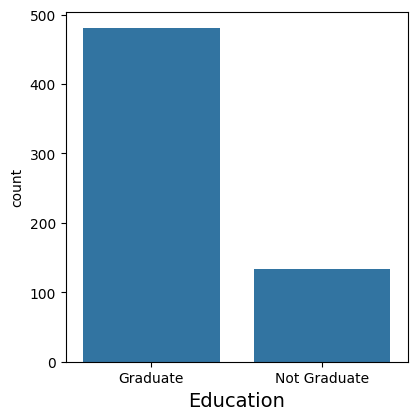

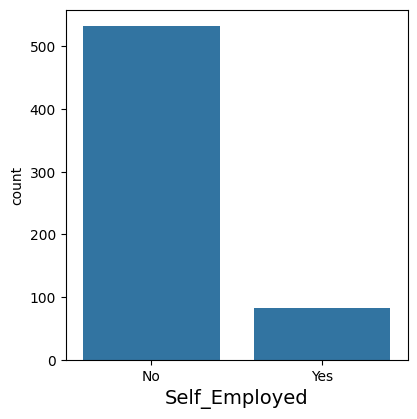

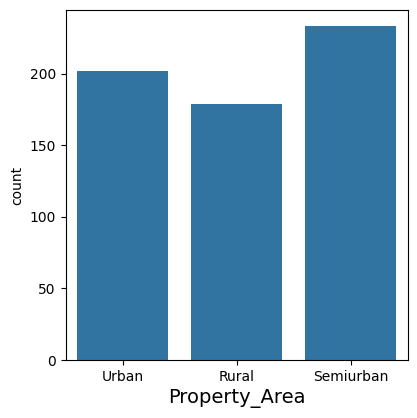

In [123]:
#plot for categorical columns

for i in categorical[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i , data=df)
    plt.xlabel(i, fontsize=14)

In [ ]:
From the results above we can convey following things about the dataset::
1)the number of male applicants is higher compared to female applicants.
2)The number of applicants that has been married is higher compared to applicants that hasn't married.
3) High number of applications has no dependents.
4) The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.
5)The number of applicants that are not self employed is higher compared to applicants that are self employed.
6)There is a balanced distribution between Urban, Rural, and Semiurban property area.

In [109]:
numerical

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

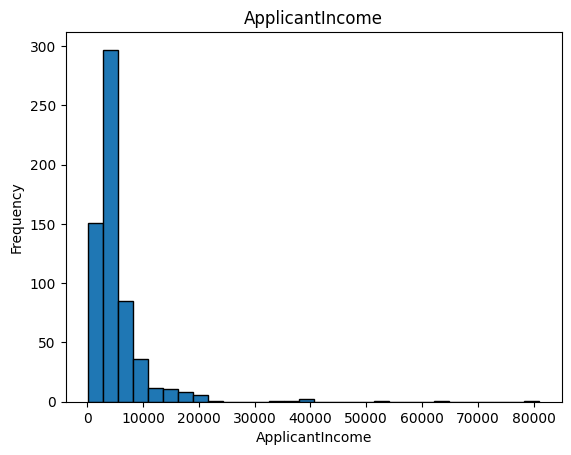

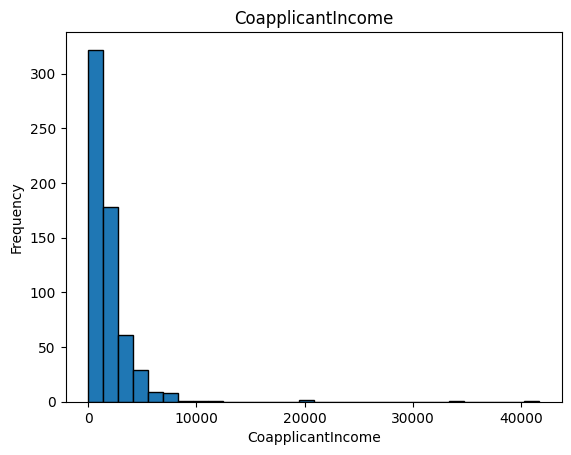

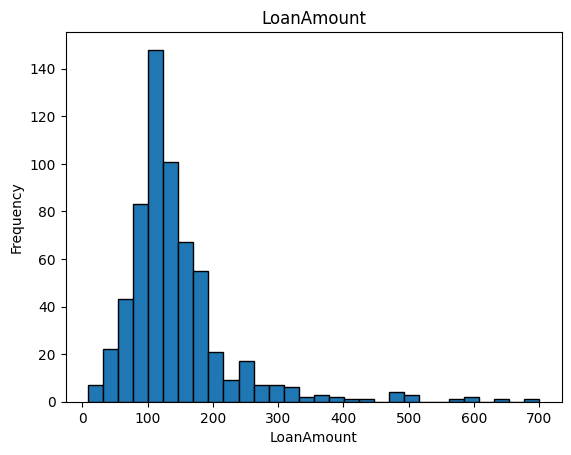

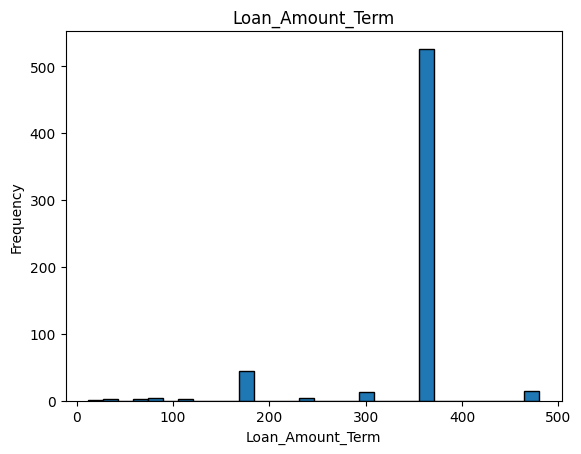

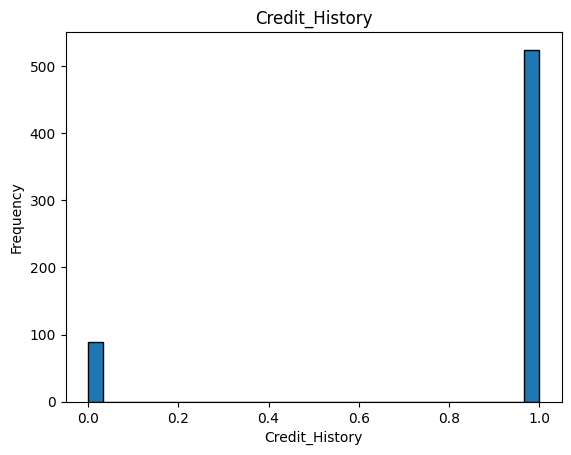

In [94]:
#Plot for numerical data

for i in numerical:
    plt.hist(df[i], bins=30, edgecolor='k')
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
 Feature Engineering

In [137]:
# Feature Engineering
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

# Log Transformation
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])
df['Total_Income_log'] = np.log1p(df['Total_Income'])

# Label Encoding for Categorical Value
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
        df[col] = le.fit_transform(df[col])

# Drop unnecessary columns
df.drop(['ApplicantIncome', 'CoapplicantIncome', 'Total_Income'], axis=1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Income_Ratio,EMI,LoanAmount_log,Total_Income_log
0,1,0,0,0,0,NaN,360.0,1.0,2,1,NaN,NaN,NaN,8.674197
1,1,1,1,0,0,128.0,360.0,1.0,0,0,0.021015,0.355556,4.859812,8.714732
2,1,1,0,0,1,66.0,360.0,1.0,2,1,0.022000,0.183333,4.204693,8.006701
3,1,1,0,1,0,120.0,360.0,1.0,2,1,0.024287,0.333333,4.795791,8.505525
4,1,0,0,0,0,141.0,360.0,1.0,2,1,0.023500,0.391667,4.955827,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,360.0,1.0,0,1,0.024483,0.197222,4.276666,7.972811
610,1,1,3,0,0,40.0,180.0,1.0,0,1,0.009742,0.222222,3.713572,8.320448
611,1,1,1,0,0,253.0,360.0,1.0,2,1,0.030438,0.702778,5.537334,9.025576
612,1,1,2,0,0,187.0,360.0,1.0,2,1,0.024660,0.519444,5.236442,8.933796


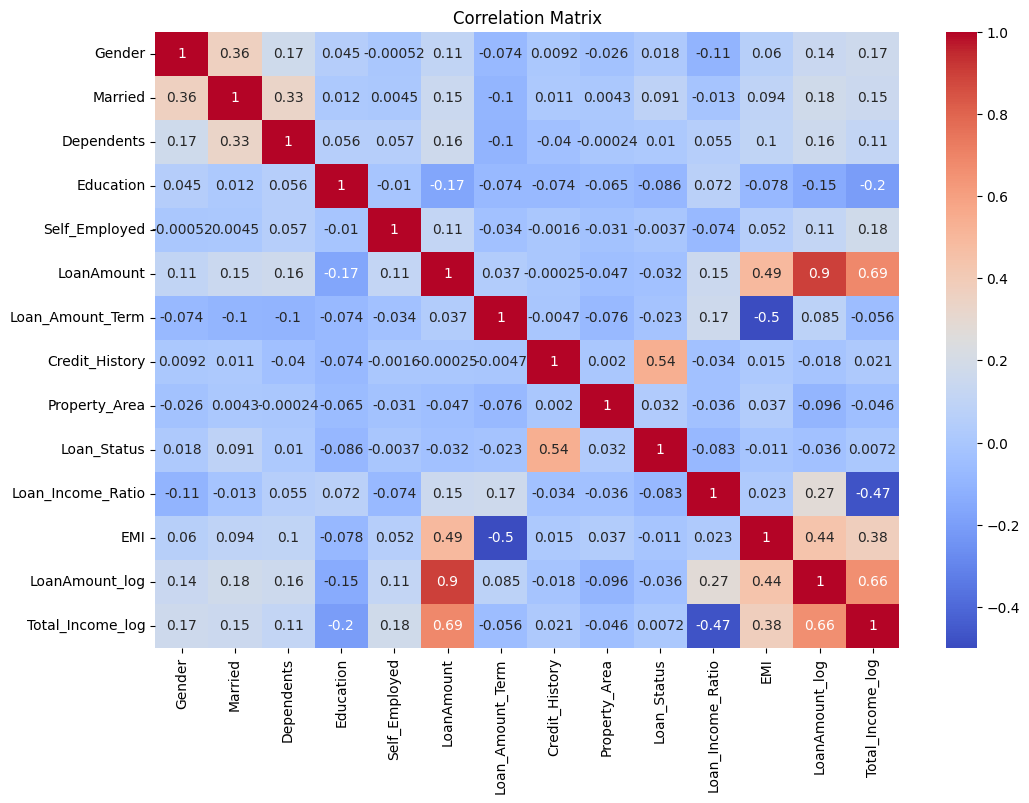

In [128]:
# Correlation matrix for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [151]:
## Separate features and target
X = df.drop('Loan_Status', axis=1) # using all the columns except
                                    #loan status as input feature
y = df['Loan_Status'] # Using Loan_status as target variable

# Standard Scaling
scaler = StandardScaler()
scaler.fit(X)



,copy,True
,with_mean,True
,with_std,True


In [156]:
#Feature selection
# Apply SelectKBest for chi-square test

select_k_best = SelectKBest(chi2, k=10) 
X_new = select_k_best.fit_transform(X, y) 

# Display selected features
selected_features = X.columns[select_k_best.get_support()]
print("Selected Features using Chi-Square Test:",
selected_features.tolist())


Selected Features using Chi-Square Test: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'EMI']


In [157]:
# check if any negative values
print((X < 0).any().any()) # This will print True if any negative values are present in the entire DataFrame


False


In [ ]:
# Feature Selection - Chi2 Test
chi2_selector = SelectKBest(chi2, k=10)
X_kbest = chi2_selector.fit_transform(abs(X_scaled), y)
selected_features = X.columns[chi2_selector.get_support()].tolist()

# PCA - Dimensionality Reduction
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
X_pca

In [163]:
#Milestone 2

# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint


In [164]:
 #Train a Base Model
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

# Initialize a basic DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data and calculate the accuracy of the base model
y_pred = model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred)
print(f'Base Model Accuracy: {base_accuracy * 100:.2f}%') # Printbase model accuracy


Base Model Accuracy: 69.81%


In [165]:
#Apply Grid Search for Hyperparameter Tuning

# Define a hyperparameter grid for tuning the decision tree model
param_grid = {
 'max_depth': [3, 5, 10, None], # Different depth values to try
 'min_samples_split': [3, 5, 10], # Number of samples required to split a node
 'min_samples_leaf': [1, 2, 4], # Minimum samples required at each leaf node
 'criterion': ['gini', 'entropy'] # Splitting criterion (Gini impurity or entropy)
}

# Initialize GridSearchCV, which will test all combinations of the parameters using cross-validation

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from Grid Search and print the best parameters
best_grid_model = grid_search.best_estimator_ # Best model from grid search
best_grid_params = grid_search.best_params_ # Best parameters found

# Predict with the best model and calculate accuracy
grid_y_pred = best_grid_model.predict(X_test)
grid_accuracy = accuracy_score(y_test, grid_y_pred)
print(f'Best Grid Search Accuracy: {grid_accuracy * 100:.2f}%') #Print accuracy of grid search model
print(f'Best Grid Search Parameters: {best_grid_params}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Grid Search Accuracy: 81.76%
Best Grid Search Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3}


In [167]:
param_dist = {
 'max_depth': [3, 5, 10, None], # Possible values for max depth
 'min_samples_split': randint(2, 10), # Randomly sampled values for min_samples_split
 'min_samples_leaf': randint(1, 10), # Randomly sampled values formin_samples_leaf
 'criterion': ['gini', 'entropy'] # Possible criterion for splitting nodes
}
# Initialize RandomizedSearchCV with a random subset of the hyperparameter space
random_search = RandomizedSearchCV(estimator=model,
param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1,
verbose=1, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Retrieve the best model from Random Search and print the best parameters
best_random_model = random_search.best_estimator_ # Best model from random search
best_random_params = random_search.best_params_ # Best parameters found

# Predict with the best model and calculate accuracy
random_y_pred = best_random_model.predict(X_test)
random_accuracy = accuracy_score(y_test, random_y_pred)

print(f'Best Random Search Accuracy: {random_accuracy * 100:.2f}%') #Print accuracy of random search model
print(f'Best Random Search Parameters: {best_random_params}') # Printbest parameters found
# Final Evaluation
# Print the comparison of the models' accuracies to see improvements
print(f"Base Model Accuracy: {base_accuracy * 100:.2f}%") # Base model accuracy for reference
print(f"Grid Search Best Model Accuracy: {grid_accuracy * 100:.2f}%") # Grid search model accuracy
print(f"Random Search Best Model Accuracy: {random_accuracy * 100:.2f}%") # Random search model accuracy

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Random Search Accuracy: 83.65%
Best Random Search Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
Base Model Accuracy: 69.81%
Grid Search Best Model Accuracy: 81.76%
Random Search Best Model Accuracy: 83.65%


In [169]:
#use a Random Forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
# Fit the model to the training data
model.fit(X_train, y_train)
RandomForestClassifier(random_state=42)

#Evaluate the model

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'New Model Accuracy: {accuracy * 100:.2f}%')

# Hyperparameter Tuning (Grid Search)
param_grid = {
 'n_estimators': [50, 100, 200],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)
print(f'Best Model Accuracy: {best_accuracy * 100:.2f}%')


New Model Accuracy: 80.50%
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Model Accuracy: 82.39%


In [170]:
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler and transform the data
X_standardized = scaler.fit_transform(X)
print(X_standardized)

[[ 0.37225346  0.72447618  0.1299412  ... -0.28259708 -0.00591021
   0.07926005]
 [ 0.37225346  0.72447618 -0.7627717  ... -0.73827804 -1.30876454
  -1.22081207]
 [ 0.37225346  0.72447618 -0.7627717  ... -0.34139463 -0.1332322
  -0.30488043]
 ...
 [ 0.37225346  0.72447618  0.1299412  ...  0.63611453  1.34149574
   0.6500258 ]
 [ 0.37225346  0.72447618  1.02265409 ...  0.1510348   0.74310312
   0.48150159]
 [-2.0003017  -1.33599639 -0.7627717  ... -0.24584862  0.0697159
  -0.44295772]]


In [150]:
#Milestone 2

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Best Parameters: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}
Validation Accuracy: 0.8490566037735849
              precision    recall  f1-score   support

           0       0.95      0.55      0.69        33
           1       0.83      0.99      0.90        73

    accuracy                           0.85       106
   macro avg       0.89      0.77      0.80       106
weighted avg       0.86      0.85      0.84       106



In [ ]:
# Loan Prediction Enhanced Feature Engineering and Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Merge for consistent processing
train['Source'] = 'train'
test['Source'] = 'test'
full_data = pd.concat([train, test], ignore_index=True)

# Fill Missing Values
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    full_data[col].fillna(full_data[col].mode()[0], inplace=True)

for col in ['LoanAmount']:
    full_data[col].fillna(full_data[col].median(), inplace=True)

full_data['Loan_Amount_Term'].fillna(full_data['Loan_Amount_Term'].mode()[0], inplace=True)

# Feature Engineering
full_data['Total_Income'] = full_data['ApplicantIncome'] + full_data['CoapplicantIncome']
full_data['Loan_Income_Ratio'] = full_data['LoanAmount'] / full_data['Total_Income']
full_data['EMI'] = full_data['LoanAmount'] / full_data['Loan_Amount_Term']

# Log Transformation
full_data['LoanAmount_log'] = np.log1p(full_data['LoanAmount'])
full_data['Total_Income_log'] = np.log1p(full_data['Total_Income'])

# Label Encoding
cat_cols = full_data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    if col != 'Loan_ID':
        full_data[col] = le.fit_transform(full_data[col])

# Drop unnecessary columns
full_data.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'Total_Income'], axis=1, inplace=True)

# Split back
train = full_data[full_data['Source'] == 0].drop('Source', axis=1)
test = full_data[full_data['Source'] == 1].drop(['Source', 'Loan_Status'], axis=1)

X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)

# Feature Selection - Chi2 Test
chi2_selector = SelectKBest(chi2, k=10)
X_kbest = chi2_selector.fit_transform(abs(X_scaled), y)
selected_features = X.columns[chi2_selector.get_support()].tolist()

# PCA - Dimensionality Reduction
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Model Training
X_train, X_val, y_train, y_val = train_test_split(X_kbest, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4]
}
model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_val)
print("Best Parameters:", model.best_params_)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Final Prediction
final_model = model.best_estimator_
test_final = chi2_selector.transform(test_scaled)
test_preds = final_model.predict(test_final)

submission = pd.read_csv("test.csv")[['Loan_ID']]
submission['Loan_Status'] = test_preds
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})
submission.to_csv("submission.csv", index=False)
print("Submission file saved.")
